In [3]:
import pandas as pd

In [9]:
df = pd.read_json('data/05-rks.json')
df.set_axis(['date', 'domain', 'department'], axis=1, inplace=True)

In [10]:
df

,date,domain,department
0,12.02.2022,trade.timstep.com,Генпрокуратура
1,12.02.2022,arsenalmarkets.org,Генпрокуратура
2,12.02.2022,ww14.bookzip.online,Минкомсвязь
3,12.02.2022,w3.baza-knig.fun,Минкомсвязь
4,12.02.2022,kino-ussr.zfilm-hd.me,Минкомсвязь
...,...,...,...
991814,22.11.2012,http://omsk-legal.com/,ФСКН
991815,21.11.2012,http://www.youtube.com/watch?v=hhdIRMi141I&fea...,Роспотребнадзор
991816,21.11.2012,http://absurdopedia.wikia.com/wiki/Как_правиль...,Роспотребнадзор
991817,19.11.2012,http://www.psyflora.ru,ФСКН


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
by_date = df.groupby([pd.Grouper(key='date', freq='M')]).count()
by_date.plot()

<AxesSubplot:xlabel='date'>

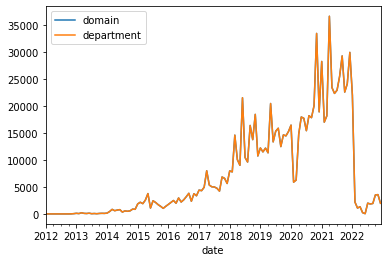

In [33]:
by_department = df.groupby(['department', pd.Grouper(key='date', freq='M')]).count()
by_department.unstack('department', fill_value=0)

domain  \
department 109 гарнизонный военный суд   
date                                     
2019-03-31                           4   
2020-05-31                           1   
2020-08-31                           3   
2020-09-30                           2   
2021-01-31                           3   
...                                ...   
2013-12-31                           0   
2012-05-31                           0   
2012-11-30                           0   
2012-12-31                           0   
2012-01-31                           0   

                                                                     \
department 109 гарнизонный военный суд - Территории за пределами РФ   
date                                                                  
2019-03-31                                                  0         
2020-05-31                                                  0         
2020-08-31                                                  0         
2020-09-30                                                  0         
2021-01-31                                                  0         
...                                                       ...         
2013-12-31                                                  0         
2012-05-31                                                  0         
2012-11-30                                                  0         
2012-12-31                                                  0         
2012-01-31                                                  0         

                                                                    \
department 40 гарнизонный военный суд - Территории за пределами РФ   
date                                                                 
2019-03-31                                                  0        
2020-05-31                                                  0        
2020-08-31                                                  0        
2020-09-30                                                  0        
2021-01-31                                                  0        
...                                                       ...        
2013-12-31                                                  0        
2012-05-31                                                  0        
2012-11-30                                                  0        
2012-12-31                                                  0        
2012-01-31                                                  0        

                                                          \
department Абаканский городской суд - Республика Хакасия   
date                                                       
2019-03-31                                             0   
2020-05-31                                             0   
2020-08-31                                             0   
2020-09-30                                             5   
2021-01-31                                             0   
...                                                  ...   
2013-12-31                                             0   
2012-05-31                                             0   
2012-11-30                                             0   
2012-12-31                                             0   
2012-01-31                                             0   

                                                                      \
department Абаканский городской суд Республики Хакасия в. г. Абакане   
date                                                                   
2019-03-31                                                  0          
2020-05-31                                                  0          
2020-08-31                                                  0          
2020-09-30                                                  0          
2021-01-31                                                  0          
...                                               

In [37]:
departments = df.department.unique()
list(departments)

['Генпрокуратура',
 'Минкомсвязь',
 'ФНС',
 'Мосгорсуд',
 'Росздравнадзор',
 'Роскомнадзор',
 'Октябрьский районный суд - Санкт-Петербург',
 'Ленинский районный суд г. Омска - Омская область',
 'Ленинский районный суд г. Ижевска - Удмуртская Республика',
 'Тигильский районный суд - Камчатский край',
 'МВД',
 'Палехский районный суд - Ивановская область',
 'Ленинский районный суд г. Челябинска - Челябинская область',
 'Магасский районный суд - Республика Ингушетия',
 'Кировский районный суд г. Астрахани - Астраханская область',
 'Ярцевский городской суд - Смоленская область',
 'Советский районный суд г. Челябинска - Челябинская область',
 'Себежский районный суд - Псковская область',
 'Монастырщинский районный суд - Смоленская область',
 'Мантуровский районный суд - Костромская область',
 'Бикинский городской суд - Хабаровский край',
 'Старорусский районный суд - Новгородская область',
 'Среднеахтубинский районный суд - Волгоградская область',
 'Заволжский районный суд г. Твери - Тверск

In [38]:
# попробуем построить географию судов

In [139]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

dep_hierarchy = {'district_court': {}}

for department in departments:
    if "районный суд" in department:
        pos = department.find("районный суд")
        court_name = department[:pos]
        geography = department[pos+len("районный суд"):]
        geo_parts = [p.strip() for p in geography.split('- ')]
        geo_parts = [p.lower() for p in geo_parts]
        geo_parts = list(map(lambda p: p if "области" not in p else morph.parse(p[:p.find("области")].strip())[0].inflect({'sing', 'nomn'}).word + " область", geo_parts))
        geo_parts = list(map(lambda p: p if "кр." not in p else morph.parse(p[:p.find("кр.")].strip())[0].inflect({'sing', 'nomn'}).word + "край", geo_parts))
        geo_parts = list(map(lambda p: p if "края" not in p else morph.parse(p[:p.find("края")].strip())[0].inflect({'sing', 'nomn'}).word + " край", geo_parts))
        geo_parts = list(map(lambda p: p if "г." not in p else morph.parse(p[p.find("г.")+len("г."):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "гор." not in p else morph.parse(p[p.find("гор.")+len("гор."):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "города" not in p else morph.parse(p[p.find("города")+len("города"):].strip())[0].normal_form, geo_parts))
        # geo_parts = [morph.parse(p)[0].normal_form if len(p.split(' ')) == 1 else p for p in geo_parts]
        if len(geo_parts) > 0:
            if geo_parts[-1] not in dep_hierarchy['district_court']:
                dep_hierarchy['district_court'][geo_parts[-1]] = []
            dep_hierarchy['district_court'][geo_parts[-1]].append(department)
    else:
        print(department)
            
        

Генпрокуратура
Минкомсвязь
ФНС
Мосгорсуд
Росздравнадзор
Роскомнадзор
МВД
Ярцевский городской суд - Смоленская область
Бикинский городской суд - Хабаровский край
Мончегорский городской суд - Мурманская область
Холмский городской суд - Сахалинская область
Долгопрудненский городской суд - Московская область
Курганский городской суд - Курганская область
Тайгинский городской суд - Кемеровская область
Орехово-Зуевский городской суд - Московская область
Обнинский городской суд - Калужская область
Шахтинский городской суд - Ростовская область
Ачинский городской суд - Красноярский край
Островский городской суд - Псковская область
суд
Трехгорный городской суд Челябинской области
Гайский городской суд - Оренбургская область
Клинский городской суд - Московская область
Видновский городской суд - Московская область
Майкопский городской суд - Республика Адыгея (Адыгея)
Петропавловск-Камчатский городской суд - Камчатский край
Великолукский городской суд - Псковская область
Донской городской суд - Туль

In [137]:
dep_hierarchy

{'district_court': {'санкт-петербург': ['Октябрьский районный суд - Санкт-Петербург',
   'Василеостровский районный суд - Санкт-Петербург',
   'Красногвардейский районный суд - Санкт-Петербург',
   'Колпинский районный суд - Санкт-Петербург',
   'Дзержинский районный суд - Санкт-Петербург',
   'Калининский районный суд - Санкт-Петербург',
   'Смольнинский районный суд - Санкт-Петербург',
   'Василеостровский районный суд г. Санкт-Петербурга',
   'Октябрьский районный суд города Санкт-Петербурга',
   'Кировский районный суд - Санкт-Петербург',
   'Пушкинский районный суд - Санкт-Петербург',
   'Ленинский районный суд - Санкт-Петербург',
   'Кронштадтский районный суд - Санкт-Петербург',
   'Красносельский районный суд - Санкт-Петербург',
   'Невский районный суд - Санкт-Петербург',
   'Московский районный суд - Санкт-Петербург',
   'Куйбышевский районный суд - Санкт-Петербург',
   'Приморский районный суд - Санкт-Петербург',
   'Калининский районный суд города Санкт-Петербурга',
   'Сес

In [138]:
# сохраним в файл и отредактируем вручную
import json
import codecs

with codecs.open('data/06-departments.json', 'w', encoding='utf-8') as f:
    json.dump(dep_hierarchy, f, ensure_ascii=False)

In [144]:
dep_hierarchy = {'city_court': {}}

for department in departments:
    if "городской суд" in department:
        pos = department.find("городской суд")
        court_name = department[:pos]
        geography = department[pos+len("городской суд"):]
        geo_parts = [p.strip() for p in geography.split('- ')]
        geo_parts = [p.lower() for p in geo_parts]
        geo_parts = list(map(lambda p: p if "республики" not in p else morph.parse(p[p.find("республики")+len("республики"):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "области" not in p else morph.parse(p[:p.find("области")].strip())[0].inflect({'sing', 'nomn'}).word + " область", geo_parts))
        geo_parts = list(map(lambda p: p if "кр." not in p else morph.parse(p[:p.find("кр.")].strip())[0].inflect({'sing', 'nomn'}).word + "край", geo_parts))
        geo_parts = list(map(lambda p: p if "края" not in p else morph.parse(p[:p.find("края")].strip())[0].inflect({'sing', 'nomn'}).word + " край", geo_parts))
        geo_parts = list(map(lambda p: p if "г." not in p else morph.parse(p[p.find("г.")+len("г."):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "гор." not in p else morph.parse(p[p.find("гор.")+len("гор."):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "города" not in p else morph.parse(p[p.find("города")+len("города"):].strip())[0].normal_form, geo_parts))
        # geo_parts = [morph.parse(p)[0].normal_form if len(p.split(' ')) == 1 else p for p in geo_parts]
        if len(geo_parts) > 0:
            if geo_parts[-1] not in dep_hierarchy['city_court']:
                dep_hierarchy['city_court'][geo_parts[-1]] = []
            dep_hierarchy['city_court'][geo_parts[-1]].append(department)

In [146]:
# сохраним в файл и отредактируем вручную
import json
import codecs

with codecs.open('data/08-city_court.json', 'w', encoding='utf-8') as f:
    json.dump(dep_hierarchy, f, ensure_ascii=False)

In [148]:
dep_hierarchy = {'military_court': {}}

for department in departments:
    if "военный суд" in department:
        pos = department.find("военный суд")
        court_name = department[:pos]
        geography = department[pos+len("военный суд"):]
        geo_parts = [p.strip() for p in geography.split('- ')]
        geo_parts = [p.lower() for p in geo_parts]
        geo_parts = list(map(lambda p: p if "республики" not in p else morph.parse(p[p.find("республики")+len("республики"):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "области" not in p else morph.parse(p[:p.find("области")].strip())[0].inflect({'sing', 'nomn'}).word + " область", geo_parts))
        geo_parts = list(map(lambda p: p if "кр." not in p else morph.parse(p[:p.find("кр.")].strip())[0].inflect({'sing', 'nomn'}).word + "край", geo_parts))
        geo_parts = list(map(lambda p: p if "края" not in p else morph.parse(p[:p.find("края")].strip())[0].inflect({'sing', 'nomn'}).word + " край", geo_parts))
        geo_parts = list(map(lambda p: p if "г." not in p else morph.parse(p[p.find("г.")+len("г."):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "гор." not in p else morph.parse(p[p.find("гор.")+len("гор."):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "города" not in p else morph.parse(p[p.find("города")+len("города"):].strip())[0].normal_form, geo_parts))
        # geo_parts = [morph.parse(p)[0].normal_form if len(p.split(' ')) == 1 else p for p in geo_parts]
        if len(geo_parts) > 0:
            if geo_parts[-1] not in dep_hierarchy['military_court']:
                dep_hierarchy['military_court'][geo_parts[-1]] = []
            dep_hierarchy['military_court'][geo_parts[-1]].append(department)

In [154]:
# сохраним в файл и отредактируем вручную
import json
import codecs

with codecs.open('data/11-military_court.json', 'w', encoding='utf-8') as f:
    json.dump(dep_hierarchy, f, ensure_ascii=False)

In [151]:
dep_hierarchy = {'regional_court': {}}

for department in departments:
    if "областной суд" in department:
        pos = department.find("военный суд")
        court_name = department[:pos]
        geography = department[pos+len("военный суд"):]
        geo_parts = [p.strip() for p in geography.split('- ')]
        geo_parts = [p.lower() for p in geo_parts]
        geo_parts = list(map(lambda p: p if "республики" not in p else morph.parse(p[p.find("республики")+len("республики"):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "области" not in p else morph.parse(p[:p.find("области")].strip())[0].inflect({'sing', 'nomn'}).word + " область", geo_parts))
        geo_parts = list(map(lambda p: p if "кр." not in p else morph.parse(p[:p.find("кр.")].strip())[0].inflect({'sing', 'nomn'}).word + "край", geo_parts))
        geo_parts = list(map(lambda p: p if "края" not in p else morph.parse(p[:p.find("края")].strip())[0].inflect({'sing', 'nomn'}).word + " край", geo_parts))
        geo_parts = list(map(lambda p: p if "г." not in p else morph.parse(p[p.find("г.")+len("г."):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "гор." not in p else morph.parse(p[p.find("гор.")+len("гор."):].strip())[0].normal_form, geo_parts))
        geo_parts = list(map(lambda p: p if "города" not in p else morph.parse(p[p.find("города")+len("города"):].strip())[0].normal_form, geo_parts))
        # geo_parts = [morph.parse(p)[0].normal_form if len(p.split(' ')) == 1 else p for p in geo_parts]
        if len(geo_parts) > 0:
            if geo_parts[-1] not in dep_hierarchy['regional_court']:
                dep_hierarchy['regional_court'][geo_parts[-1]] = []
            dep_hierarchy['regional_court'][geo_parts[-1]].append(department)

In [152]:
dep_hierarchy

{'regional_court': {'калужская область': ['Калужский областной суд - Калужская область'],
  'оренбургская область': ['Оренбургский областной суд - Оренбургская область'],
  'московская область': ['Московский областной суд - Московская область'],
  'ульяновская область': ['Ульяновский областной суд - Ульяновская область'],
  'челябинская область': ['Челябинский областной суд - Челябинская область'],
  'областной суд': ['Ростовский областной суд'],
  'курганская область': ['Курганский областной суд - Курганская область'],
  'нижегородская область': ['Нижегородский областной суд - Нижегородская область']}}

In [155]:
# сохраним в файл и отредактируем вручную
import json
import codecs

with codecs.open('data/14-regional_court.json', 'w', encoding='utf-8') as f:
    json.dump(dep_hierarchy, f, ensure_ascii=False)

In [ ]:
dep_hierarchy = {'regional_court': {}}

for department in departments:
    if "областной суд" in department:
        continue
    if "военный суд" in department:
        continue